In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import quad

The following equation has been coded up
$$
\begin{equation}
f_{p_{\mu}} P = \begin{cases}
0 & \text{if } 0 < p \leq 0.573(1 - m)p_0 \\
2.34a(1.754p - (1 - m)p_0) + 2.34b\ln\left(\frac{1.745p}{(1-m)p_0}\right) & \text{if } 0.573(1 - m)p_0 < p \leq 0.573(1 + m)p_0 \\
2.34(2mp_0a + \ln\left(\frac{1+m}{1-m}\right)b) & \text{if } 0.573(1 + m)p_0 < p \leq (1 - m)p_0 \\
2.34a((1+m)p_0 - p) + 2.34b\ln\left(\frac{(1+m)p_0}{p}\right) & \text{if } (1 - m)p_0 < p \leq (1+m)p_0 \\
0 & \text{if } p > (1+m)p_0 \\
\end{cases}
\end{equation}
$$


In [2]:
def fpP(p, p0, m, a, b):

    if p > 0 and p <= 0.573*(1 - m)*p0:
        fpP= 0
    elif p  > 0.573*(1 - m)*p0 and p  <= 0.573*(1 + m)*p0:
        fpP = 2.34*a*(1.754*p - (1 - m)*p0) + 2.34*b*np.log(1.745*p/((1-m)*p0))
    elif p  > 0.573*(1 + m)*p0 and p <= (1 - m)*p0:
        fpP = 2.34*(2.*m*p0*a + np.log((1+m)/(1-m))*b)
    elif p > (1 - m)*p0 and p <= (1+m)*p0:
        fpP = 2.34*a*((1+m)*p0 - p)  + 2.34*b*np.log((1+m)*p0/p)
    elif p > (1+m)*p0:
        fpP = 0
    else:
        raise ValueError
    return fpP

In [3]:
p =  np.linspace(2000,6000,1000)

In [4]:
i1 = quad(fpP, 2000, 6000, args = (5000.,0.1,-1.43e-7,1.2e-3))[0]
i2 = quad(fpP, 2000, 6000, args = (5000.,0.164,-1.43e-7,1.2e-3))[0]
i3 = quad(fpP, 2000, 6000, args = (5000.,0.2,-1.43e-7,1.2e-3))[0]

/tmp/ipykernel_171861/2113886148.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  i2 = quad(fpP, 2000, 6000, args = (5000.,0.164,-1.43e-7,1.2e-3))[0]


In [5]:
fpParray1 = [fpP(i,p0 = 5000.,m = 0.1,a = -1.43e-7,b =  1.2e-3)/i1 for i in p]
fpParray2 = [fpP(i,p0 = 5000.,m = 0.164,a = -1.43e-7,b = 1.2e-3)/i2 for i in p]
fpParray3 = [fpP(i,5000.,0.2,-1.43e-7,1.2e-3)/i3 for i in p]

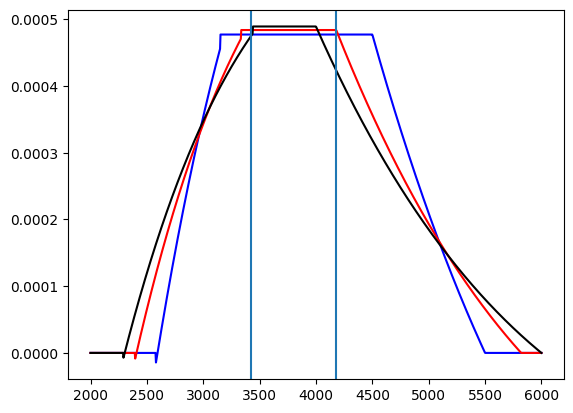

In [6]:
plt.plot(p, fpParray1, c = 'b')
plt.plot(p, fpParray2, c = 'r')
plt.plot(p, fpParray3, c = 'black')
plt.axvline(3800+380)
plt.axvline(3800-380)